In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("A02_data.csv", delimiter=',', skipinitialspace=True)

In [5]:
data.head()

,department,status,age,salary,count
0,sales,senior,31...35,46K...50K,30
1,sales,junior,26...30,26K...30K,40
2,sales,junior,31...35,31K...35K,40
3,systems,junior,21...25,46K...50K,20
4,systems,senior,31...35,66K...70K,5


In [11]:
label_encoder = LabelEncoder()

for column in ['department', 'status', 'age', 'salary']:
    data[column] = label_encoder.fit_transform(data[column])

In [12]:
X = data[['department', 'age', 'salary']]
y = data['status']

In [13]:
sample_weights = data['count']

In [14]:
X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(X, y, sample_weights, test_size=0.2, random_state=42)

In [15]:
# Initialize and train the decision tree classifier using weights
clf = DecisionTreeClassifier(criterion='gini')  # CART uses 'gini' criterion for classification
clf.fit(X_train, y_train, sample_weight=weights_train)  # Use sample weights

DecisionTreeClassifier()

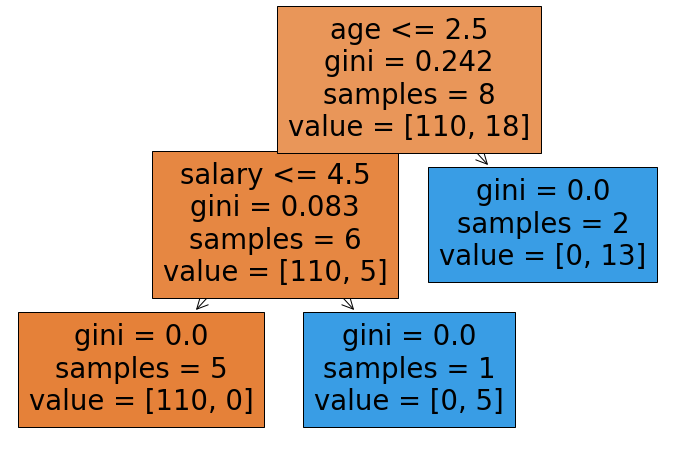

In [16]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf, feature_names=['department', 'age', 'salary'], filled=True)
plt.show()